# Perceptrón

In [1]:
import numpy as np

import sklearn
import sklearn.datasets
import sklearn.linear_model
import sklearn.neural_network

import matplotlib.pyplot as plt
import mlutils

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Generamos datos para jugar un poco y entender...

In [2]:
def load_dataset_up_down(size, seed=39):
    np.random.seed(seed)
    x = np.random.poisson(5, size) * (np.random.randint(0,2, size) * 2 - 1)
    y = (np.random.poisson(5, size) + 1) * (np.random.randint(0,2, size) * 2 - 1)
    X = np.array(list(zip(x,y)))
    Y = (X[:,1] > 0).astype(np.int8)
    return X, Y

## Entrenamiento con 100 puntos

Veamos los datos

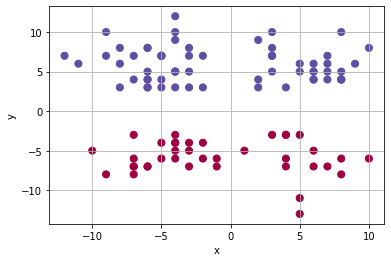

In [3]:
X, Y = load_dataset_up_down(100)
indices = np.argsort(Y)
X = X[indices]
Y = Y[indices]
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap=plt.cm.Spectral)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

Entrenamos el perceptrón con estos datos:

Documentación [Perceptrón](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)

In [4]:
clf = sklearn.linear_model.Perceptron(max_iter=5, random_state=1)
clf.fit(X, Y)

Perceptron(max_iter=5, random_state=1)

Graficamos utilizando la función que escribimos en el módulo mlutils:

Accuracy: 100 


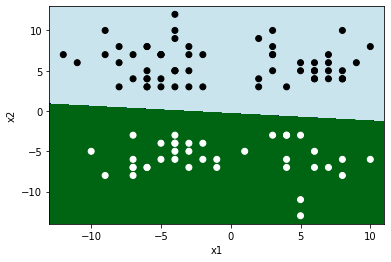

In [5]:
mlutils.plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)
predictions = clf.predict(X)
print ('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))

## Probemos ahora con más datos

Accuracy: 100 


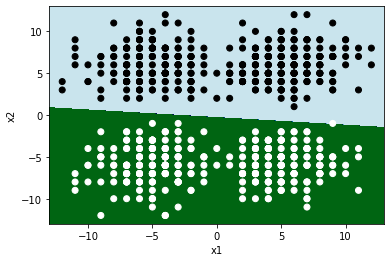

In [6]:
X, Y = load_dataset_up_down(800)
mlutils.plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)
predictions = clf.predict(X)
print ('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))

## Qué sucede si entrenamos varias veces con distintas semillas? 

In [7]:
np.random.randint(0,100)

25

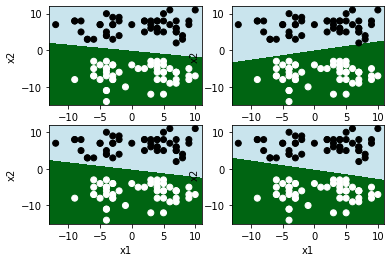

In [8]:
X, Y = load_dataset_up_down(100,seed=3)
for i in range(1,5): 
    plt.subplot(2,2,i)
    clf = sklearn.linear_model.Perceptron(max_iter=5, random_state=np.random.randint(0,100))
    clf.fit(X, Y)
    mlutils.plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)
plt.show()

## Y si los datos no son linealmente separables?

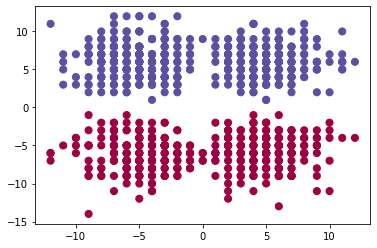

In [9]:
X, Y = load_dataset_up_down(1000)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap=plt.cm.Spectral);

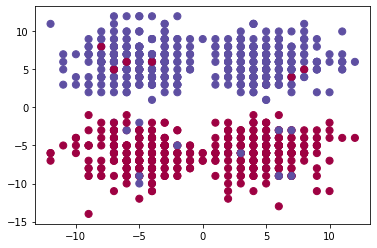

In [10]:
some_noise = np.random.binomial(n=1, p=.03, size=Y.shape[0])
Y = np.logical_xor(Y, some_noise).astype(np.int8)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap=plt.cm.Spectral);

Documentación [Perceptrón](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)

In [11]:
clf = sklearn.linear_model.Perceptron(shuffle=False, max_iter=5, random_state=1)
clf.fit(X, Y)

Perceptron(max_iter=5, random_state=1, shuffle=False)

Accuracy: 49 


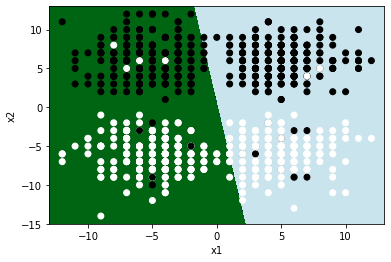

In [12]:
mlutils.plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)
predictions = clf.predict(X)
print ('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))

In [13]:
clf = sklearn.linear_model.Perceptron(shuffle=False, max_iter=100, random_state=10)
clf.fit(X, Y);

Accuracy: 54 


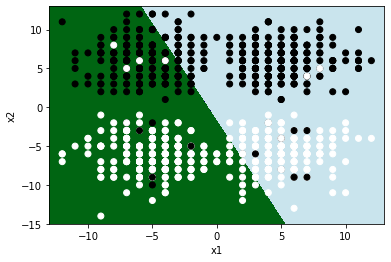

In [14]:
mlutils.plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)
predictions = clf.predict(X)
print ('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))

-- Epoch 1
Norm: 11.05, NNZs: 2, Bias: 3.000000, T: 1000, Avg. loss: 2.434000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 6.08, NNZs: 2, Bias: 2.000000, T: 2000, Avg. loss: 2.657000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 10.30, NNZs: 2, Bias: 4.000000, T: 3000, Avg. loss: 2.273000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 7.00, NNZs: 1, Bias: 3.000000, T: 4000, Avg. loss: 2.399000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 7.62, NNZs: 2, Bias: 1.000000, T: 5000, Avg. loss: 2.412000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 11.05, NNZs: 2, Bias: 6.000000, T: 6000, Avg. loss: 2.203000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 8.00, NNZs: 1, Bias: 9.000000, T: 7000, Avg. loss: 2.418000
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 9.06, NNZs: 2, Bias: 6.000000, T: 8000, Avg. loss: 2.560000
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.39, NNZs: 2, Bias: 5.000000, T: 9000, Avg. loss: 2.428000
Total training time: 0.0

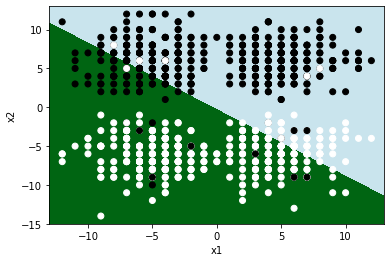

In [15]:
clf = sklearn.linear_model.Perceptron(verbose=1)
clf.fit(X, Y)
mlutils.plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)
predictions = clf.predict(X)
print ('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))

-- Epoch 1
Norm: 0.02, NNZs: 2, Bias: 0.005000, T: 1000, Avg. loss: 0.002356
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 1, Bias: 0.009000, T: 2000, Avg. loss: 0.001845
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.04, NNZs: 1, Bias: 0.008000, T: 3000, Avg. loss: 0.001836
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.06, NNZs: 1, Bias: -0.001000, T: 4000, Avg. loss: 0.001500
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.07, NNZs: 1, Bias: 0.000000, T: 5000, Avg. loss: 0.001364
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.09, NNZs: 1, Bias: 0.002000, T: 6000, Avg. loss: 0.001340
Total training time: 0.01 seconds.
Convergence after 6 epochs took 0.01 seconds
Accuracy: 96 


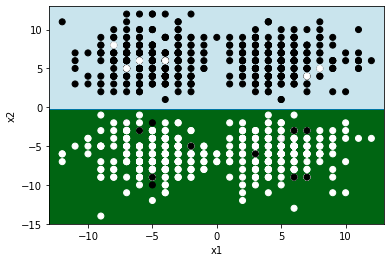

In [16]:
clf = sklearn.linear_model.Perceptron(penalty="l1",alpha=1e-3,eta0=0.001,random_state=1, verbose=1)
clf.fit(X, Y)
mlutils.plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)
predictions = clf.predict(X)
print ('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))